In [103]:
import torch
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [104]:
import json

In [105]:
def importJson(filepath, scale = 0.25):
    with open(filepath, "r") as read_file:
        data = json.load(read_file)
    shapes = data.get("shapes")
    target = torch.empty(int(data.get("imageHeight")*scale), int(data.get("imageWidth")*scale))
    for i in range(len(shapes)):
        x_pos = round(shapes[i].get("points")[0][1]*scale)
        y_pos = round(shapes[i].get("points")[0][0]*scale)
        target[x_pos][y_pos] = 1

<built-in method keys of dict object at 0x0000023FE29B7700>
None


In [107]:
print(shapes[0].keys())

dict_keys(['label', 'points', 'group_id', 'shape_type', 'flags'])


In [108]:
scale = 0.25
target = torch.empty(int(data.get("imageHeight")*scale), int(data.get("imageWidth")*scale))
print(target.shape)
print(len(shapes))
for i in range(len(shapes)):
    x_pos = round(shapes[i].get("points")[0][1]*scale)
    y_pos = round(shapes[i].get("points")[0][0]*scale)
    target[x_pos][y_pos] = 1

torch.Size([1008, 756])
256


torch.Size([75, 75])
tensor(4)


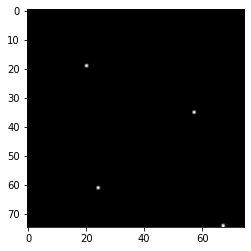

In [128]:
point = target[100:175, 300:375]
print(point.shape)
plt.imshow(point, cmap="gray")
print(torch.count_nonzero(point))

In [110]:
img = Image.open("..\data\images\mitosis_img_005.jpg").convert("L").resize((756, 1008))
img = transforms.ToTensor()(img).squeeze()
print(img.shape)

torch.Size([1008, 756])


In [147]:
side = 32
target_map = torch.empty(1008-side, 756-side)
for i in tqdm(range(1008-side)):
    for j in range(756-side):
        target_map[i][j] = torch.count_nonzero(target[i: i+side, j:j+side])

100%|██████████| 976/976 [00:07<00:00, 128.91it/s]


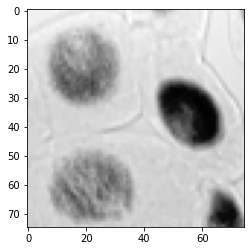

In [152]:
plt.imshow(img[100:175, 300:375], cmap='gray')


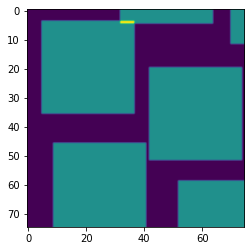

In [151]:
import torch.nn.functional as F
padded = F.pad(target_map, pad=(16, 16 ,16 ,16), value=0)
plt.imshow(padded[100:175, 300:375])


In [116]:
padded.shape

torch.Size([1008, 756])